In [1]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
data = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin1')
data.head(20)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [3]:
# Renommer les colonnes
data = data.rename(columns={'v1': 'target', 'v2': 'message'})

# Vérifier les colonnes restantes après renommage
print(data.columns)

# Afficher les premières lignes pour vérifier les changements
print(data.head())


Index(['target', 'message', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
  target                                            message Unnamed: 2  \
0    ham  Go until jurong point, crazy.. Available only ...        NaN   
1    ham                      Ok lar... Joking wif u oni...        NaN   
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3    ham  U dun say so early hor... U c already then say...        NaN   
4    ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [4]:
# Supprimer les colonnes inutiles
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Vérifier les colonnes restantes
print(data.columns)

Index(['target', 'message'], dtype='object')


In [5]:
# Afficher les informations sur le DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [6]:
# Afficher les statistiques descriptives
print(data.describe())

       target                 message
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


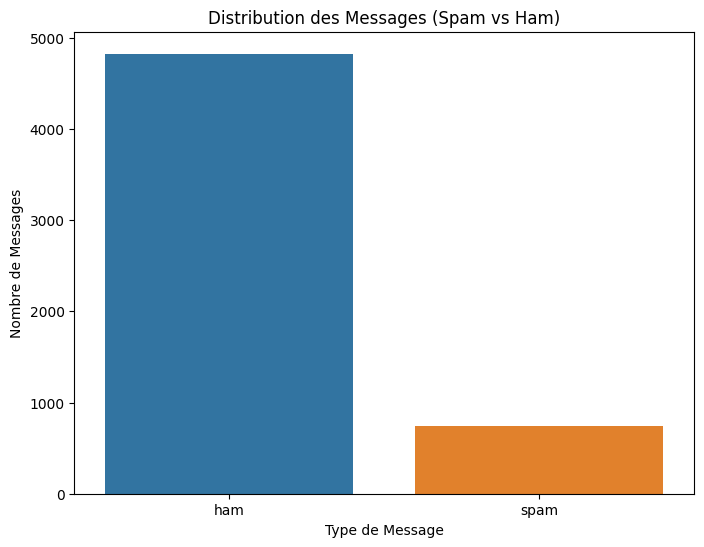

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualiser la distribution des classes (spam vs ham)
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=data)
plt.title('Distribution des Messages (Spam vs Ham)')
plt.xlabel('Type de Message')
plt.ylabel('Nombre de Messages')
plt.show()


In [8]:
# Afficher la distribution des classes
distribution = data['target'].value_counts()

# Afficher le résultat
print("Distribution des Messages (Spam vs Ham) :")
for label, count in distribution.items():
    print(f"{label} : {count} messages")

Distribution des Messages (Spam vs Ham) :
ham : 4825 messages
spam : 747 messages


In [9]:
# Compter le nombre de messages dans chaque classe
ham_count = data[data['target'] == 'ham'].shape[0]
spam_count = data[data['target'] == 'spam'].shape[0]

from sklearn.utils import resample

# Séparer les classes ham et spam
ham_data = data[data['target'] == 'ham']
spam_data = data[data['target'] == 'spam']

# Augmenter les messages 'spam' pour avoir le même nombre que les messages 'ham'
spam_upsampled = resample(spam_data, 
                          replace=True,    
                          n_samples=ham_count, 
                          random_state=42)  

# Concaténer les données 'ham' avec les 'spam' suréchantillonnés
balanced_data = pd.concat([ham_data, spam_upsampled])

# Mélanger les données pour éviter tout biais d'ordre
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Afficher la distribution des classes après équilibrage
print(balanced_data['target'].value_counts())


target
ham     4825
spam    4825
Name: count, dtype: int64


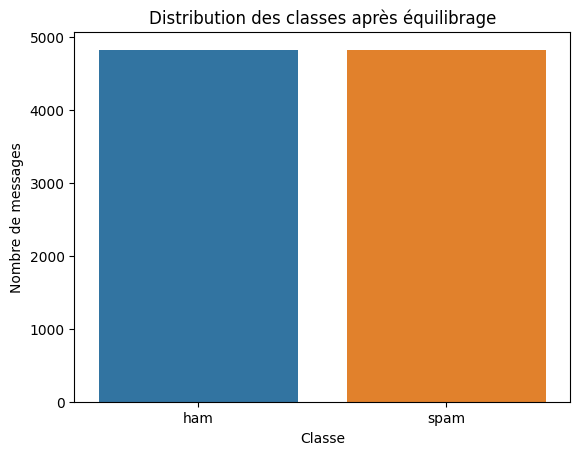

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compter le nombre de messages dans chaque classe
class_counts = balanced_data['target'].value_counts()

# Créer un diagramme en barres pour visualiser la distribution des classes
sns.barplot(x=class_counts.index, y=class_counts.values)

# Ajouter des étiquettes et un titre
plt.title('Distribution des classes après équilibrage')
plt.xlabel('Classe')
plt.ylabel('Nombre de messages')

# Afficher le graphique
plt.show()


In [11]:
# Afficher quelques exemples de messages
print(balanced_data['message'].head())



0      Mm yes dear look how i am hugging you both. :-P
1                    But pls dont play in others life.
2            i can call in  &lt;#&gt;  min if thats ok
3    HMM yeah if your not too grooved out! And im l...
4    Latest News! Police station toilet stolen, cop...
Name: message, dtype: object


In [12]:
import pandas as pd
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer

# Initialiser le stemming
stemmer = PorterStemmer()

# Fonction pour nettoyer le texte
def clean_text(text):
    text = text.lower()  # Convertir en minuscules
    text = re.sub(r'\d+', '', text)  # Retirer les chiffres
    text = re.sub(r'[^\w\s]', '', text)  # Retirer la ponctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Retirer les espaces multiples
    return text

# Appliquer le nettoyage sur les données équilibrées
balanced_data['message'] = balanced_data['message'].apply(clean_text)

# Fonction pour tokeniser le texte
def tokenize_text(text):
    return text.split()  # Utiliser split() pour tokeniser

# Appliquer la tokenisation
balanced_data['tokens'] = balanced_data['message'].apply(tokenize_text)

# Fonction pour enlever les stop words
def remove_stop_words(tokens):
    stop_words = ENGLISH_STOP_WORDS
    return [word for word in tokens if word not in stop_words]

# Appliquer la suppression des stop words
balanced_data['tokens'] = balanced_data['tokens'].apply(remove_stop_words)

# Fonction pour lemmatiser les tokens avec stemming
def stem_tokens(tokens):
    return [stemmer.stem(word) for word in tokens]

# Appliquer le stemming
balanced_data['tokens'] = balanced_data['tokens'].apply(stem_tokens)

# Vérifier le résultat
print(balanced_data[['message', 'tokens']].head())

# Vectorisation des textes avec TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Rejoindre les tokens pour chaque message
balanced_data['clean_message'] = balanced_data['tokens'].apply(lambda x: ' '.join(x))

# Vectorisation avec TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(balanced_data['clean_message'])

# Vérifier la forme des données TF-IDF
print(X.shape)


                                             message  \
0       mm yes dear look how i am hugging you both p   
1                   but pls dont play in others life   
2                 i can call in ltgt min if thats ok   
3  hmm yeah if your not too grooved out and im lo...   
4  latest news police station toilet stolen cops ...   

                                              tokens  
0                       [mm, ye, dear, look, hug, p]  
1                             [pl, dont, play, life]  
2                              [ltgt, min, that, ok]  
3  [hmm, yeah, groov, im, look, forward, pound, s...  
4  [latest, news, polic, station, toilet, stolen,...  
(9650, 7027)


In [13]:
# Vectorisation des textes
from sklearn.feature_extraction.text import TfidfVectorizer

# Rejoindre les tokens pour chaque message dans les données équilibrées
balanced_data['clean_message'] = balanced_data['tokens'].apply(lambda x: ' '.join(x))

# Vectorisation avec TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(balanced_data['clean_message'])

# Vérifier la forme des données TF-IDF
print(X.shape)


(9650, 7027)


In [14]:
# Extraire les features et les labels à partir des données équilibrées
X = balanced_data['clean_message']  
y = balanced_data['target']         

# Vectorisation avec TF-IDF (sur les données équilibrées)
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Division des données en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vérifier les formes des ensembles d'entraînement et de test
print(X_train.shape, X_test.shape)


(7720, 7027) (1930, 7027)


In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Créer le modèle Naive Bayes
nb_model = MultinomialNB()

# Entraîner le modèle
nb_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred_nb = nb_model.predict(X_test)

# Évaluer la performance
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Accuracy: 0.9860103626943005
              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       975
        spam       0.98      0.99      0.99       955

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930



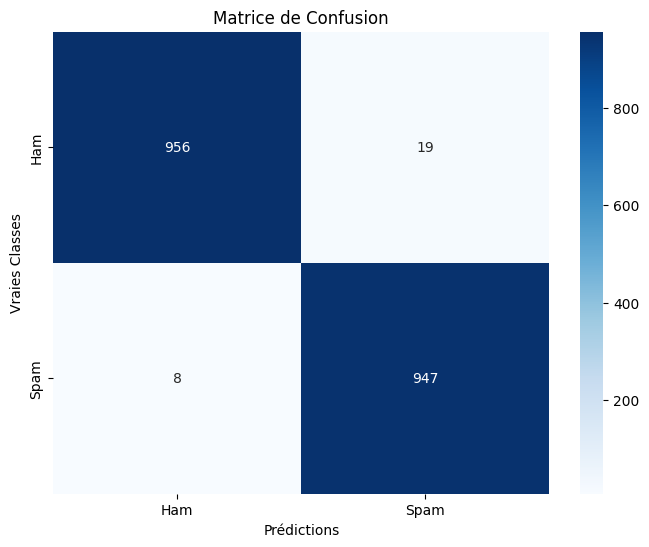

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies Classes')
plt.show()


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Créer le modèle de régression logistique
log_model = LogisticRegression(max_iter=1000)

# Entraîner le modèle
log_model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred_log = log_model.predict(X_test)

# Évaluer la performance
print("Régression Logistique:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Régression Logistique:
Accuracy: 0.9953367875647668
              precision    recall  f1-score   support

         ham       0.99      1.00      1.00       975
        spam       1.00      0.99      1.00       955

    accuracy                           1.00      1930
   macro avg       1.00      1.00      1.00      1930
weighted avg       1.00      1.00      1.00      1930



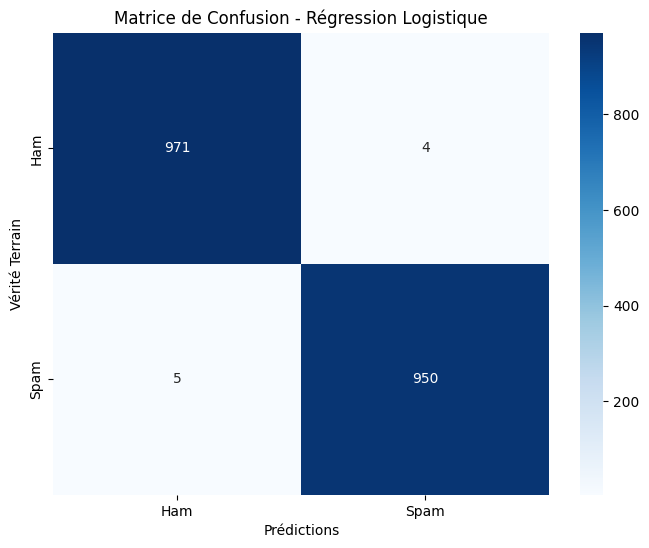

In [18]:

# Matrice de confusion
conf_matrix_log = confusion_matrix(y_test, y_pred_log)

# Afficher la matrice de confusion avec une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Matrice de Confusion - Régression Logistique')
plt.xlabel('Prédictions')
plt.ylabel('Vérité Terrain')
plt.show()

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Créer le modèle SVM
svm_model = SVC(kernel='linear')  

# Entraîner le modèle avec les données rééchantillonnées
svm_model.fit(X_train, y_train) 

# Prédire sur l'ensemble de test
y_pred_svm = svm_model.predict(X_test)

# Évaluer la performance
print("SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM:
Accuracy: 0.9994818652849741
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       975
        spam       1.00      1.00      1.00       955

    accuracy                           1.00      1930
   macro avg       1.00      1.00      1.00      1930
weighted avg       1.00      1.00      1.00      1930



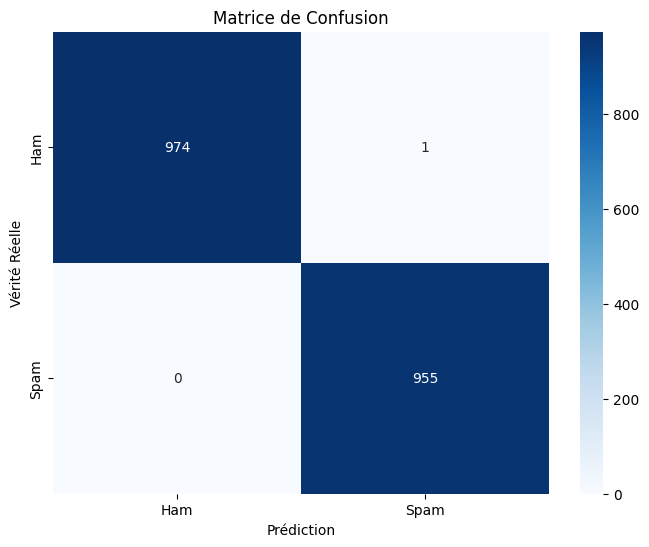

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Matrice de confusion
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Afficher la matrice de confusion avec une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Prédiction')
plt.ylabel('Vérité Réelle')
plt.title('Matrice de Confusion')
plt.show()


In [21]:
#enregistrer le model SVM
import joblib

# Sauvegarder le modèle
joblib.dump(log_model, 'log_model.pkl')


['log_model.pkl']

In [22]:
#enregistrer le model SVM
import joblib

# Sauvegarder le modèle
joblib.dump(svm_model, 'svm_model.pkl')


['svm_model.pkl']

In [23]:
#enregistrer le model SVM
import joblib

# Sauvegarder le modèle
joblib.dump(nb_model, 'nb_model.pkl')


['nb_model.pkl']

In [24]:
# Recharger le modèle SVM
loaded_model = joblib.load('log_model.pkl')


In [26]:
# Recharger le modèle SVM
loaded_model = joblib.load('svm_model.pkl')


In [27]:
# Recharger le modèle SVM
loaded_model = joblib.load('nb_model.pkl')


In [28]:
# Exemple de prédiction avec le modèle chargé
sample_data = X_test[:10]  
predictions = loaded_model.predict(sample_data)
print(predictions)


['spam' 'spam' 'ham' 'spam' 'spam' 'spam' 'spam' 'ham' 'ham' 'spam']


In [29]:

# Enregistrer le vectorizer
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [30]:
# Charger le vectorizer TF-IDF si vous l'avez enregistré
vectorizer = joblib.load('vectorizer.pkl')


In [31]:
import pandas as pd

# Supposons que df est votre DataFrame et 'target' est la colonne contenant les étiquettes
unique_targets = y_test.unique()
print(unique_targets)


['spam' 'ham']


In [36]:
# Exemple de test
test_sms = [
    "Félicitations ! Vous avez gagné un bon d'achat de 1000 € ! Cliquez ici pour le réclamer maintenant.",  # Spam
    "Bonjour, comment vas-tu ?",  # Ham
]

for sms in test_sms:
    cleaned_data = clean_text(sms)
    vectorized_data = vectorizer.transform([cleaned_data])
    prediction = nb_model.predict(vectorized_data)[0]
    print(f"Message: '{sms}' - Prédiction: {'Spam' if prediction.lower() == 'spam' else 'Ham'}")


Message: 'Félicitations ! Vous avez gagné un bon d'achat de 1000 € ! Cliquez ici pour le réclamer maintenant.' - Prédiction: Spam
Message: 'Bonjour, comment vas-tu ?' - Prédiction: Ham
